In [120]:
import pandas as pd
import requests as r
from bs4 import BeautifulSoup
import re
import unicodedata

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm

In [121]:
# Import Data from a csv file
df= pd.read_csv('Life_Expectancy_Data.csv')
#https://www.kaggle.com/kumarajarshi/life-expectancy-who#Life%20Expectancy%20Data.csv

In [122]:
# Observation of my dataframe
# df.info()

In [123]:
# See if there is some NaN, for this project I decide to drop the lines (around 400/ 2900)
df.isna().sum()
df2=df.dropna()

In [124]:
# Observation of my df 
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [125]:
# Normalize the cols object 
df2['Country']=df2['Country'].str.replace(r'\W|[0-9]', ' ')
df2['Country']=df2['Country'].str.strip().str.lower()
df2['Status']=df2['Status'].str.replace(r'\W|[0-9]', ' ')
df2['Status']=df2['Status'].str.strip().str.lower()
df2['Country']=df2['Country'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df2['Status']=df2['Status'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [126]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [127]:
# clean cols
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace(',', '_')

In [235]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 23 columns):
country                            1649 non-null object
year                               1649 non-null int64
status                             1649 non-null object
life_expectancy                    1649 non-null float64
adult_mortality                    1649 non-null float64
infant_deaths                      1649 non-null int64
alcohol                            1649 non-null float64
percentage_expenditure             1649 non-null float64
hepatitis_b                        1649 non-null float64
measles                            1649 non-null int64
bmi                                1649 non-null float64
under_five_deaths                  1649 non-null int64
polio                              1649 non-null float64
total_expenditure                  1649 non-null float64
diphtheria                         1649 non-null float64
hiv/aids                           1649 non-null

In [129]:
df2.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [130]:
df2['year'].value_counts()

2014    131
2013    130
2011    130
2012    129
2010    128
2009    126
2008    123
2007    120
2006    114
2005    110
2004    103
2003     95
2002     81
2001     66
2000     61
2015      2
Name: year, dtype: int64

SCRAPING FOR THE CREATION OF A NEW COL 'CONTINENT'

In [131]:
url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_continent'

In [132]:
response = r.get(url)
response

<Response [200]>

In [133]:
html= r.get(url).content
soup = BeautifulSoup(html, 'lxml')

In [134]:
continents=[element.text for element in soup.select("h2 span.mw-headline")][1:-4]
# continents

In [135]:
# def strip_accents(s):
#     return ''.join(c for c in unicodedata.normalize('NFD', s)
#                   if unicodedata.category(c) != 'Mn')

In [136]:
pays=[[j.text.strip() for j in element.select('tr td > b')] for element in soup.select('table')][1:]
# pays

# Normalize the data from the scraping 

In [137]:
final_list_continents = [unicodedata.normalize("NFKD", word) for word in continents]
very_final_list_continents = [word.encode('ascii', 'ignore').decode('utf-8') for word in final_list_continents] 
very_final_list_continents = [word.lower() for word in very_final_list_continents] 
# very_final_list_continents

In [138]:
final_list_pays = [[unicodedata.normalize("NFKD", word) for word in ls] for ls in pays]
very_final_list_pays = [[word.encode('ascii', 'ignore').decode('utf-8') for word in ls] for ls in final_list_pays]
very_final_list_pays = [[word.lower() for word in ls] for ls in very_final_list_pays]
# very_final_list_pays

In [139]:
# Creation of a dictionnary, order in list continent = order in list of lists pays 
dict_c_p=dict(zip(very_final_list_continents,very_final_list_pays))
# dict_c_p

# Fonction to map 

In [140]:
##  Fonction: call a continent in my dic in fonction of the country in my df
##  if no match 'no match' it's just to practice regression
def position_continent(res,dict_c_p=dict_c_p):
    #print(res)
    test_list=[res in i for i in dict_c_p.values()]
    #print(test_list)
    res = [i for i, val in enumerate(test_list) if val]
    if len(res)==0:
        k='no match'
    else:
        k=list(dict_c_p.keys())[res[0]]
    return k

In [141]:
# create new col
df2['continent']=df2.country.map(lambda x : position_continent(x))
# df['Continent']

C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [142]:
# drop col country - we use col continent
df3=df2.drop(['country'], axis=1)

In [144]:
# df3.info()

In [145]:
df3.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [146]:
df3['status'].value_counts()

developing    1407
developed      242
Name: status, dtype: int64

In [147]:
df3['status']=df3['status'].replace(['developing','developed'],[1,2])

In [148]:
df3.life_expectancy=df3.life_expectancy.astype(int)

In [149]:
pd.crosstab(index=df3.continent,values=df3.status, columns='year', aggfunc=len)
#ttes les lignes par continent avec la col year

col_0,year
continent,
africa,439
asia,399
europe,331
no match,63
north america,168
oceania,119
south america,130


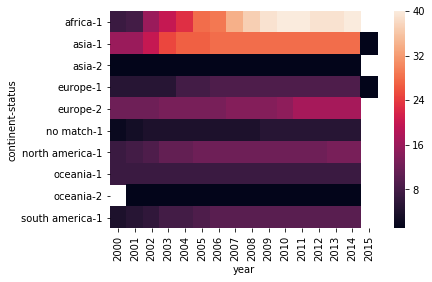

In [150]:
sns.heatmap(pd.pivot_table(data=df3, columns='year', index=['continent','status'], values='adult_mortality',aggfunc=len))
# plus il y a de pays plus les cases sont clair
# en 2015 seulemnt 2 pays

In [151]:
# ?pd.crosstab

In [153]:
# df3[df3.year<2015].groupby('year').life_expectancy.mean().plot()

In [155]:
# df3.info()

In [156]:
# df3[df3.year<2015].groupby('year').income_composition_of_resources.mean().plot()

In [158]:
# df3.columns

In [159]:
df3.pivot_table(index=['status','year'], values='life_expectancy', aggfunc=np.mean)

life_expectancy
status year                 
1      2000        68.166667
       2001        68.211538
       2002        66.417910
       2003        66.250000
       2004        66.454545
       2005        66.536842
       2006        67.090909
       2007        66.750000
       2008        66.878505
       2009        67.009091
       2010        67.153153
       2011        67.612613
       2012        68.045455
       2013        68.270270
       2014        68.339286
       2015        71.000000
2      2000        75.769231
       2001        76.142857
       2002        76.500000
       2003        76.800000
       2004        77.533333
       2005        78.000000
       2006        78.066667
       2007        78.000000
       2008        77.562500
       2009        78.000000
       2010        79.000000
       2011        80.473684
       2012        80.052632
       2013        80.052632
       2014        80.631579

In [37]:
# sns.countplot(x='gdp',hue='status', orient='year',data=df3)

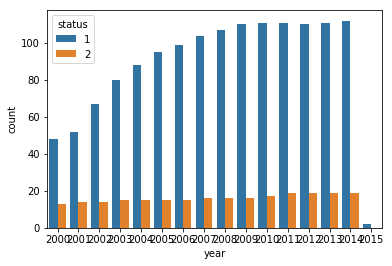

In [160]:
sns.countplot(x='year',hue='status', orient='life_expectancy',data=df3)

In [161]:
df3 = df3[df3.year != 2015]

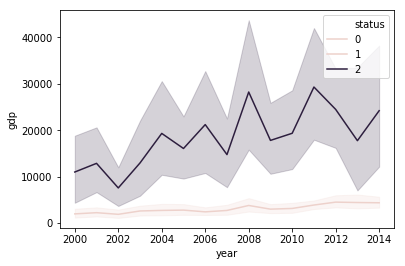

In [162]:
sns.lineplot(x='year',y='gdp',hue='status',data=df3)

In [163]:
# sns.lineplot(x='gdp',y='life_expectancy',hue='status',data=df3)

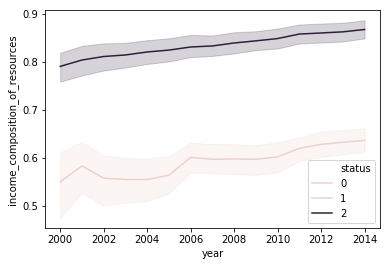

In [164]:
sns.lineplot(x='year',y='income_composition_of_resources',hue='status',data=df3)

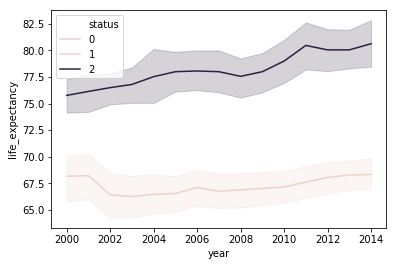

In [165]:
sns.lineplot(x='year',y='life_expectancy',hue='status',data=df3)

In [44]:
# sns.lineplot(x='life_expectancy',y='income_composition_of_resources', hue='status',data=df3)
#l'echantillon ne prend pas les gens qui nt moins de 69 ans pour les continents 2 

In [45]:
# sns.lineplot(x='life_expectancy',y='total_expenditure', hue='status',data=df3)

In [46]:
# sns.lineplot(x='life_expectancy',y='adult_mortality', hue='status',data=df3)

In [47]:
# sns.lineplot(x='adult_mortality',y='life_expectancy', hue='status',data=df3)

In [48]:
# sns.lineplot(x='life_expectancy',y='alcohol', hue='status',data=df3)

In [49]:
# df3[(df3.status==2) & (df3.life_expectancy<70)]
# sns.lineplot(x='thinness_5_9_years',y='infant_deaths', hue='status',data=df3)

In [50]:
# df3.groupby(['schooling'])['life_expectancy'].agg('mean').plot()

In [51]:
# df3.groupby('year').gdp.mean().plot()

In [52]:
# df3[df3.year<2015].groupby('year').percentage_expenditure.mean().plot()

In [166]:
df3['year']=df3['year'].replace([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

# Separate developping and developped 
The both status doesn't have the same sample / exemple 

In [167]:
df3_1=df3[df3.status==1]

In [168]:
df3_2=df3[df3.status==2]

In [56]:
# Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
#        'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
#        'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
#        'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
#        'thinness_5_9_years', 'income_composition_of_resources', 'schooling',
#        'continent'],
# #       dtype='object')

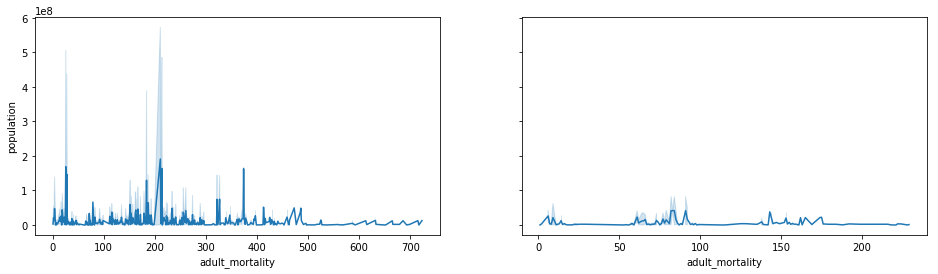

In [169]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(x='adult_mortality',y='population',data=df3_1,ax=axes[0])
sns.lineplot(x='adult_mortality',y='population',data=df3_2,ax=axes[1])

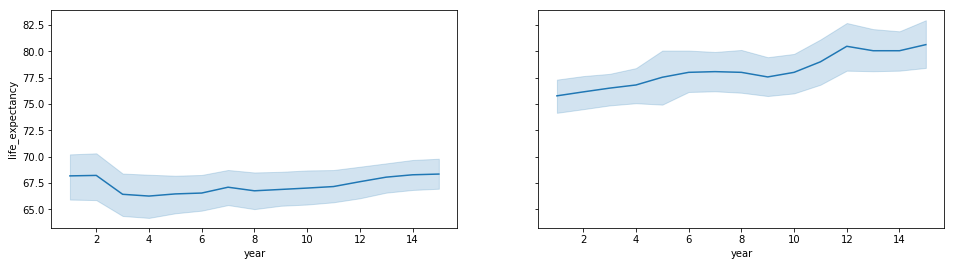

In [170]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(y='life_expectancy',x='year',data=df3_1,ax=axes[0])
sns.lineplot(y='life_expectancy',x='year',data=df3_2,ax=axes[1])

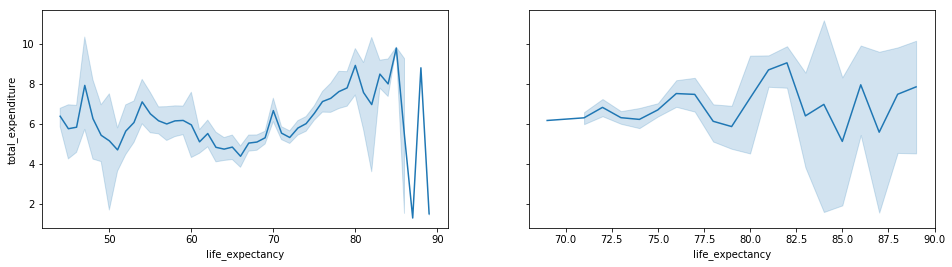

In [171]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(x='life_expectancy',y='total_expenditure',data=df3_1,ax=axes[0])
sns.lineplot(x='life_expectancy',y='total_expenditure',data=df3_2,ax=axes[1])

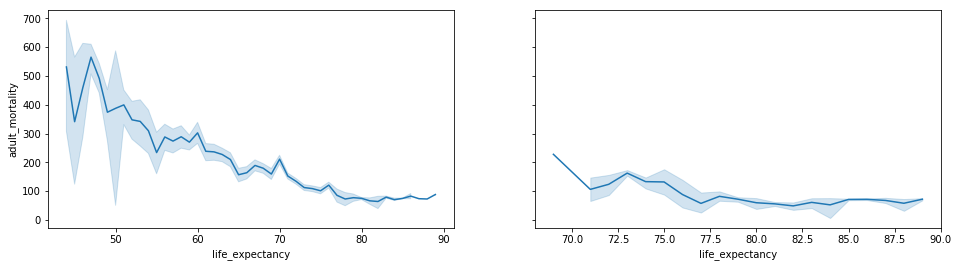

In [172]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(x='life_expectancy',y='adult_mortality',data=df3_1,ax=axes[0])
sns.lineplot(x='life_expectancy',y='adult_mortality',data=df3_2,ax=axes[1])

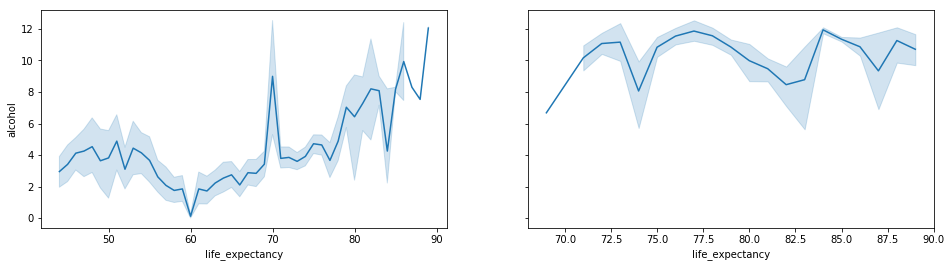

In [173]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(x='life_expectancy',y='alcohol',data=df3_1,ax=axes[0])
sns.lineplot(x='life_expectancy',y='alcohol',data=df3_2,ax=axes[1])

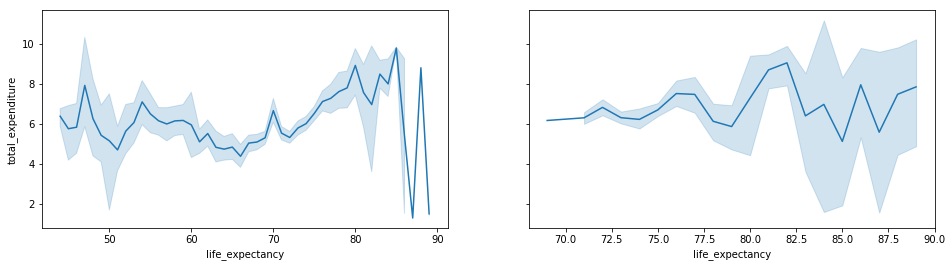

In [174]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

sns.lineplot(x='life_expectancy',y='total_expenditure',data=df3_1,ax=axes[0])
sns.lineplot(x='life_expectancy',y='total_expenditure',data=df3_2,ax=axes[1])

In [175]:
maladie=['hepatitis_b', 'measles','polio','diphtheria','hiv/aids']

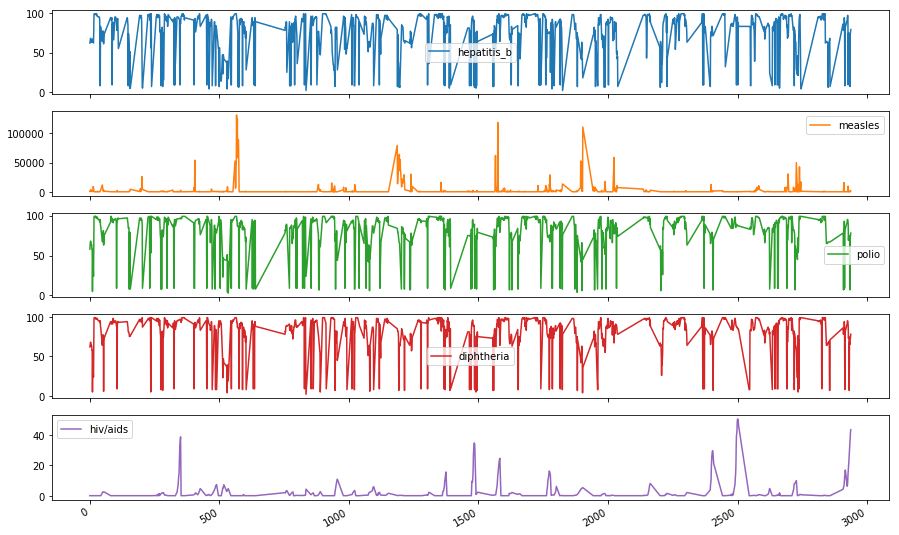

In [176]:
df3_1[maladie].plot( subplots=True, figsize=(15,10));

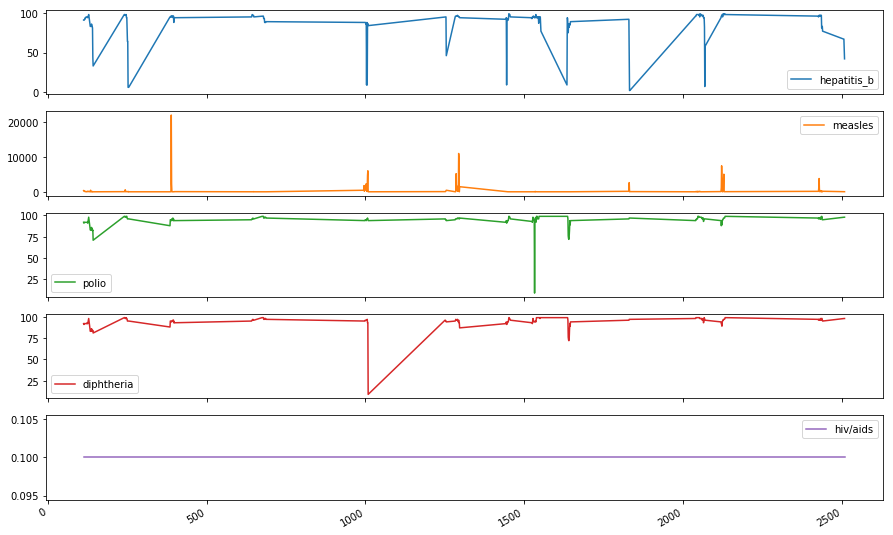

In [177]:
df3_2[maladie].plot(subplots=True, figsize=(15,10));

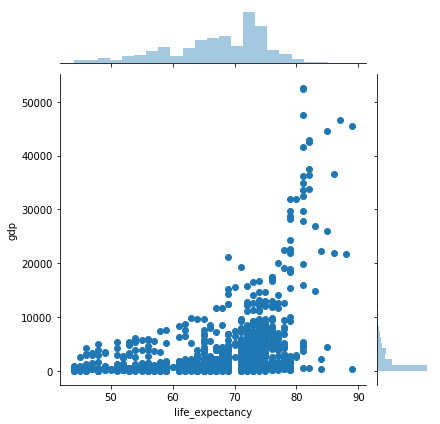

In [178]:
sns.jointplot(x='life_expectancy', y='gdp', data=df3_1)

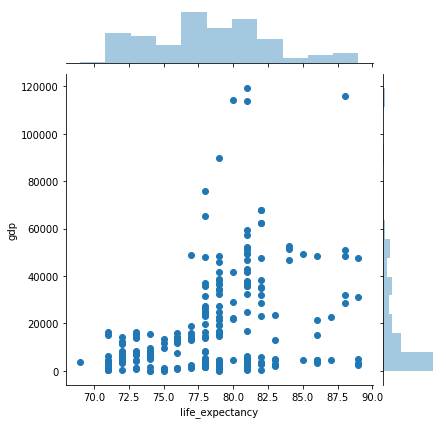

In [179]:
sns.jointplot(x='life_expectancy', y='gdp', data=df3_2)

In [180]:
# Use dummies for change the category of my col - not objet but uint8
# df4=pd.get_dummies(data=df3, columns=['continent','status'])
df4=pd.get_dummies(data=df3, columns=['continent'], drop_first=True)

In [182]:
# df4.info()

In [183]:
df4_1=df4[df4.status==1]

In [184]:
df4_2=df4[df4.status==2]

In [185]:
# df4_2.info()

In [186]:
df_corr_1=df4_1.corr().round(2)

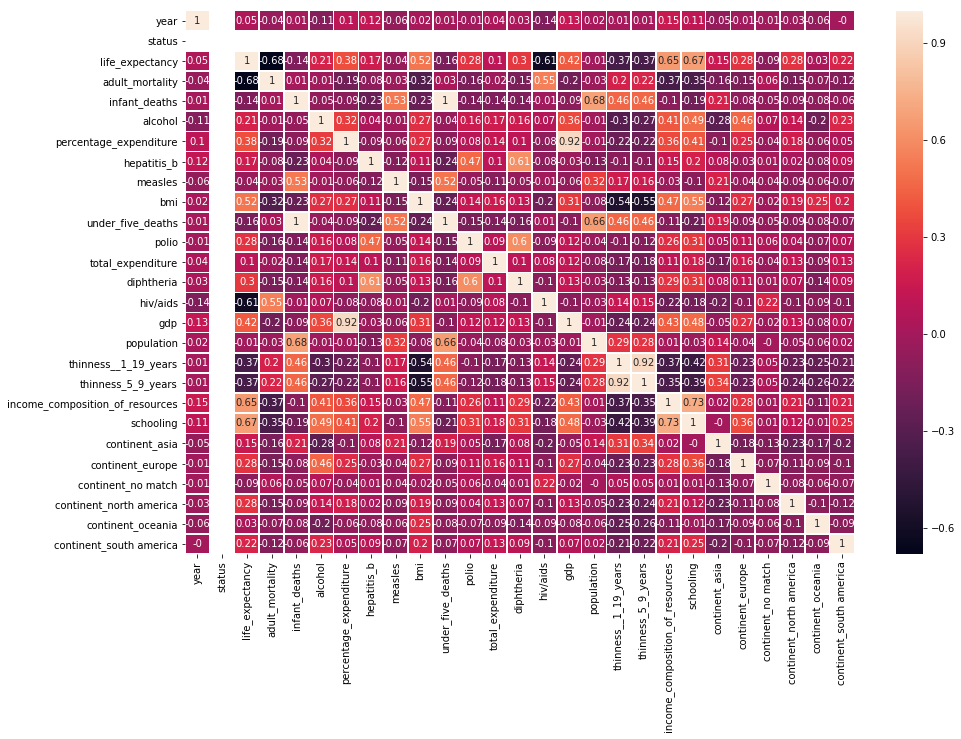

In [187]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr_1, annot=True,linewidths=.5)

corr for life expectancy = adult mortality, Incoming_composition_of_ressources, schooling,hiv/aids,bmi,gdp, percentage_expenditure

In [188]:
df_corr_2=df4_2.corr().round(2)

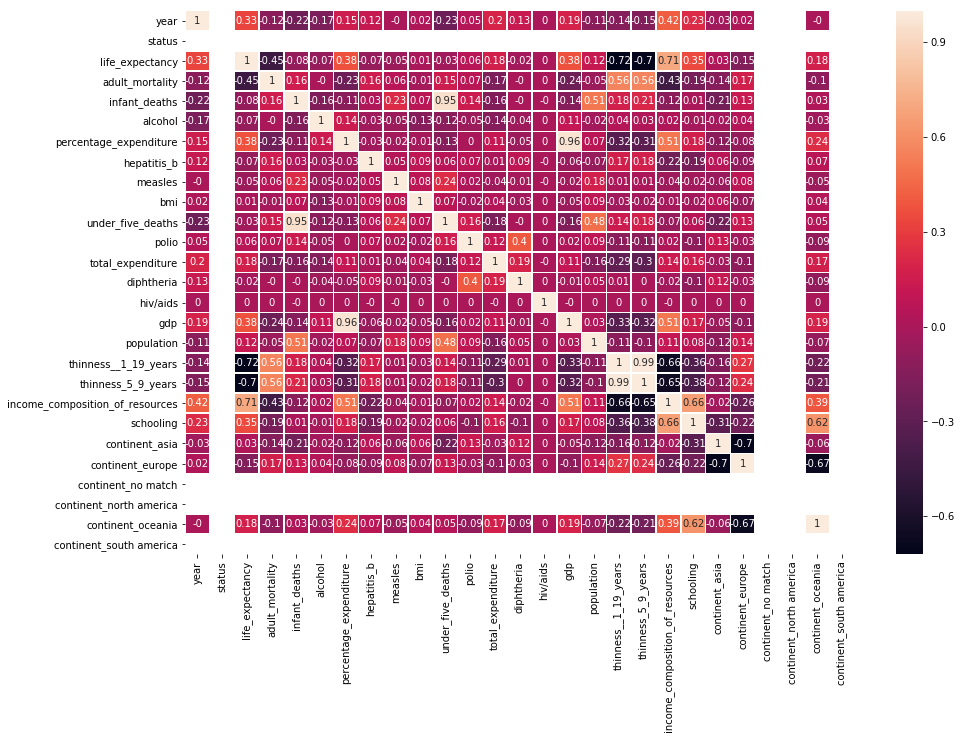

In [189]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr_2, annot=True,linewidths=.5)

corr_2 for life expectancy =  thiness_5_9_years, thiness_1_19_years, Income_composition_of_ressources

In [190]:
low_variance=[]
for col in df4_1._get_numeric_data():
    minimum=min(df4_1[col])
    ninety_perc=np.percentile(df4[col],90)
    if ninety_perc==minimum:
        low_variance.append(col)
print(low_variance)
# 3 des dummies 

['continent_no match', 'continent_oceania', 'continent_south america']


In [191]:
low_variance=[]
for col in df4_2._get_numeric_data():
    minimum=min(df4_2[col])
    ninety_perc=np.percentile(df4[col],90)
    if ninety_perc==minimum:
        low_variance.append(col)
print(low_variance)
# 3 des dummies 

['status', 'continent_no match', 'continent_oceania', 'continent_south america']


In [192]:
df4_2=df4_2.drop(columns=['status','thinness_5_9_years','gdp','under_five_deaths','continent_no match','continent_oceania','continent_south america','continent_asia','continent_north america','continent_europe'])

In [193]:
df4_1=df4_1.drop(columns=['status','thinness_5_9_years','gdp','under_five_deaths','continent_no match','continent_oceania','continent_south america','continent_asia','continent_north america','continent_europe'])

In [194]:
df4_1.corr().life_expectancy[abs(df4_1.corr().life_expectancy)>0.4].sort_values()

adult_mortality                   -0.678317
hiv/aids                          -0.613429
bmi                                0.521706
income_composition_of_resources    0.648655
schooling                          0.668423
life_expectancy                    1.000000
Name: life_expectancy, dtype: float64

In [195]:
# df4_2.corr()['life_expectancy']
df4_2.corr().life_expectancy[abs(df4_2.corr().life_expectancy)>0.4].sort_values()

thinness__1_19_years              -0.721086
adult_mortality                   -0.445933
income_composition_of_resources    0.708984
life_expectancy                    1.000000
Name: life_expectancy, dtype: float64

In [196]:
y=df4_1.life_expectancy
X=df4_1.drop('life_expectancy', axis=1)

In [197]:
from statsmodels.tools.tools import add_constant
X=add_constant(X)

In [198]:
model=sm.OLS(y,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     373.2
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:02:11   Log-Likelihood:                -3806.5
No. Observations:                1405   AIC:                             7647.
Df Residuals:                    1388   BIC:                             7736.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              52.3014      0.781     66.969      0.000      50.769      53.833
year                               -0.2054      0.026     -7.966      0.000      -0.256      -0.155
adult_mortality                    -0.0162      0.001    -16.310      0.000      -0.018      -0.014
infant_deaths                      -0.0024      0.001     -1.871      0.062      -0.005       0.000
alcohol                            -0.2288      0.037     -6.250      0.000      -0.301      -0.157
percentage_expenditure              0.0010      0.000      8.007      0.000       0.001       0.001
hepatitis_b                        -0.0003      0.005     -0.058      0.954      -0.010       0.010
measles                          1.175e-05   1.08e-05      1.090      0.276    -9.4e-06    3.29e-05
bmi                                 0.0382      0.007      5.551      0.000       0.025       0.052
polio                               0.0061      0.005      1.141      0.254      -0.004       0.017
total_expenditure                   0.0897      0.047      1.922      0.055      -0.002       0.181
diphtheria                          0.0186      0.006      3.005      0.003       0.006       0.031
hiv/aids                           -0.4599      0.018    -24.916      0.000      -0.496      -0.424
population                       1.702e-09   1.77e-09      0.962      0.336   -1.77e-09    5.17e-09
thinness__1_19_years               -0.0130      0.028     -0.462      0.644      -0.068       0.042
income_composition_of_resources     9.9805      0.866     11.521      0.000       8.281      11.680
schooling                           0.9981      0.067     14.940      0.000       0.867       1.129
==============================================================================
Omnibus:                       29.440   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.170
Skew:                          -0.212   Prob(JB):                     4.22e-10
Kurtosis:                       3.747   Cond. No.                     7.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
# X=X.drop('hepatitis_b',axis=1)
# X=X.drop('thinness__1_19_years',axis=1)
# X=X.drop('population',axis=1)
# X=X.drop('measles',axis=1)
# X=X.drop('polio',axis=1)
# X=X.drop('infant_deaths',axis=1)

In [200]:
model=sm.OLS(y,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     596.2
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:02:22   Log-Likelihood:                -3809.8
No. Observations:                1405   AIC:                             7642.
Df Residuals:                    1394   BIC:                             7699.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              51.9506      0.692     75.103      0.000      50.594      53.307
year                               -0.2109      0.025     -8.311      0.000      -0.261      -0.161
adult_mortality                    -0.0161      0.001    -16.335      0.000      -0.018      -0.014
alcohol                            -0.2311      0.036     -6.415      0.000      -0.302      -0.160
percentage_expenditure              0.0010      0.000      8.228      0.000       0.001       0.001
bmi                                 0.0408      0.006      6.459      0.000       0.028       0.053
total_expenditure                   0.0977      0.046      2.109      0.035       0.007       0.188
diphtheria                          0.0230      0.005      5.041      0.000       0.014       0.032
hiv/aids                           -0.4603      0.018    -25.015      0.000      -0.496      -0.424
income_composition_of_resources     9.9312      0.861     11.532      0.000       8.242      11.621
schooling                           1.0244      0.066     15.593      0.000       0.895       1.153
==============================================================================
Omnibus:                       27.324   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.236
Skew:                          -0.195   Prob(JB):                     1.83e-09
Kurtosis:                       3.731   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
y2=df4_2.life_expectancy
X2=df4_2.drop('life_expectancy', axis=1)

In [203]:
from statsmodels.tools.tools import add_constant
X2=add_constant(X2)

In [204]:
model2=sm.OLS(y2,X2)
model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     29.12
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           1.57e-44
Time:                        15:02:35   Log-Likelihood:                -569.97
No. Observations:                 242   AIC:                             1172.
Df Residuals:                     226   BIC:                             1228.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
year                                0.1236      0.050      2.467      0.014       0.025       0.222
adult_mortality                    -0.0008      0.004     -0.207      0.836      -0.008       0.007
infant_deaths                       0.4111      0.207      1.984      0.048       0.003       0.819
alcohol                            -0.0636      0.080     -0.792      0.429      -0.222       0.095
percentage_expenditure           2.904e-05   6.02e-05      0.482      0.630   -8.96e-05       0.000
hepatitis_b                         0.0165      0.009      1.769      0.078      -0.002       0.035
measles                            -0.0001   9.22e-05     -1.518      0.130      -0.000    4.17e-05
bmi                                -0.0051      0.010     -0.524      0.601      -0.025       0.014
polio                              -0.0222      0.027     -0.815      0.416      -0.076       0.032
total_expenditure                  -0.0182      0.074     -0.246      0.806      -0.164       0.127
diphtheria                         -0.0151      0.027     -0.561      0.575      -0.068       0.038
hiv/aids                          580.2364     59.369      9.773      0.000     463.249     697.224
population                       2.243e-09   1.19e-08      0.189      0.850   -2.11e-08    2.56e-08
thinness__1_19_years               -2.4108      0.316     -7.638      0.000      -3.033      -1.789
income_composition_of_resources    37.6027      7.140      5.266      0.000      23.533      51.673
schooling                          -0.3777      0.142     -2.662      0.008      -0.657      -0.098
==============================================================================
Omnibus:                       78.445   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.974
Skew:                           1.622   Prob(JB):                     4.08e-36
Kurtosis:                       5.375   Cond. No.                     6.94e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
# X2=X2.drop('population',axis=1)
# X2=X2.drop('total_expenditure',axis=1)
# X2=X2.drop('adult_mortality',axis=1)
# X2=X2.drop('percentage_expenditure',axis=1)
# X2=X2.drop('diphtheria',axis=1)
# X2=X2.drop('bmi',axis=1)
# X2=X2.drop('alcohol',axis=1)
# X2=X2.drop('polio',axis=1)
# X2=X2.drop('measles',axis=1)
# X2=X2.drop('hepatitis_b',axis=1)

In [206]:
model2=sm.OLS(y2,X2)
model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     86.61
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           2.04e-51
Time:                        15:02:45   Log-Likelihood:                -574.08
No. Observations:                 242   AIC:                             1160.
Df Residuals:                     236   BIC:                             1181.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
year                                0.1330      0.045      2.937      0.004       0.044       0.222
infant_deaths                       0.3714      0.164      2.262      0.025       0.048       0.695
hiv/aids                          546.3531     41.995     13.010      0.000     463.621     629.086
thinness__1_19_years               -2.3693      0.266     -8.901      0.000      -2.894      -1.845
income_composition_of_resources    37.7600      5.891      6.410      0.000      26.155      49.365
schooling                          -0.3795      0.130     -2.910      0.004      -0.636      -0.123
==============================================================================
Omnibus:                       80.496   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.135
Skew:                           1.657   Prob(JB):                     1.14e-37
Kurtosis:                       5.428   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
# MULTICOLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [209]:
pd.Series([VIF(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                              50.270514
year                                1.102503
adult_mortality                     1.681550
alcohol                             1.513105
percentage_expenditure              1.264744
bmi                                 1.518687
total_expenditure                   1.074065
diphtheria                          1.130494
hiv/aids                            1.492793
income_composition_of_resources     2.366238
schooling                           2.819892
dtype: float64

In [213]:
# X2=X2.drop(['const'], axis=1)
# X2=X2.drop(['income_composition_of_resources'], axis=1)

In [214]:
pd.Series([VIF(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

year                                 1.338955
infant_deaths                        1.097461
hiv/aids                           618.442177
thinness__1_19_years                 1.922416
income_composition_of_resources      3.329501
schooling                            1.843816
dtype: float64

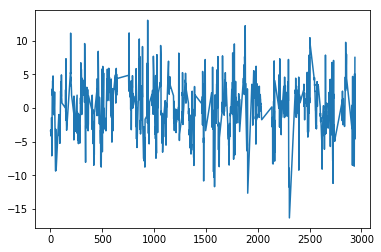

In [215]:
#nORMALITY OF RESIDUALS
plt.plot(model_fit.resid)

In [216]:
model_fit.resid.mean()

4.886561696997842e-13

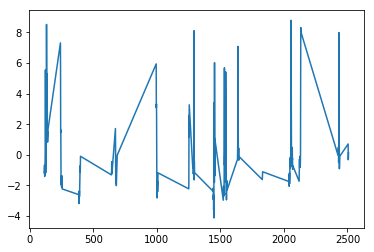

In [217]:
plt.plot(model2_fit.resid)

In [218]:
model2_fit.resid.mean()

2.0846501751639305e-14

In [219]:
model_fit.resid.describe()

count    1.405000e+03
mean     4.886562e-13
std      3.643855e+00
min     -1.630076e+01
25%     -2.335835e+00
50%      1.232174e-01
75%      2.411499e+00
max      1.301623e+01
dtype: float64

In [220]:
model2_fit.resid.describe()

count    2.420000e+02
mean     2.084650e-14
std      2.599566e+00
min     -4.122485e+00
25%     -1.636639e+00
50%     -7.595475e-01
75%      6.077996e-01
max      8.798815e+00
dtype: float64

C:\Users\leila\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


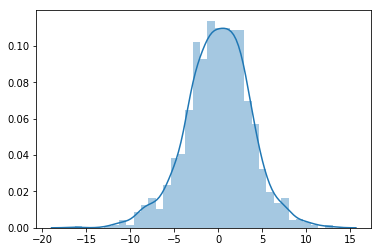

In [221]:
sns.distplot(model_fit.resid)
# erros, it s not exactly on zero

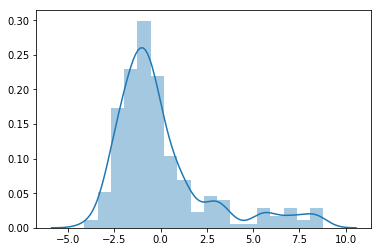

In [222]:
sns.distplot(model2_fit.resid)
# erros, it s not exactly on zero

In [105]:
?kstest

Object `kstest` not found.


In [223]:
from scipy.stats import kstest
kstest(model_fit.resid,'norm')

KstestResult(statistic=0.28229556965356994, pvalue=0.0)

In [224]:
from scipy.stats import kstest
kstest(model2_fit.resid,'norm')

KstestResult(statistic=0.2834390669188567, pvalue=0.0)

In [225]:
y_hat=model.predict(model_fit.params)
y_np=y.values

In [226]:
y_np-y_hat

array([-3.4073414 , -3.52503851, -3.59154921, ..., -4.62811337,
        6.63256543,  7.50447819])

In [227]:
model_fit.resid.values

array([-3.4073414 , -3.52503851, -3.59154921, ..., -4.62811337,
        6.63256543,  7.50447819])

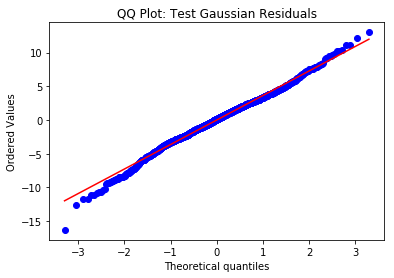

In [228]:
import pylab
import scipy.stats as stats
stats.probplot(y_np-y_hat, dist='norm', plot=pylab)
pylab.title('QQ Plot: Test Gaussian Residuals')
pylab.show()

In [229]:
y_hat_2=model2.predict(model2_fit.params)
y_np_2=y2.values

In [230]:
y_np_2-y_hat_2

array([-1.18157740e+00, -9.73266523e-01, -8.02904782e-01, -6.70492177e-01,
       -1.41442931e+00, -1.35772587e+00, -1.07370583e+00, -8.65394949e-01,
       -1.25796164e-01,  1.95983909e-01,  5.55628044e+00,  2.76459132e+00,
       -1.17889435e+00, -7.80837793e-01,  9.86704778e-01,  1.23258658e+00,
        8.47884659e+00,  8.52593629e+00,  4.84714904e+00,  3.01769989e+00,
        5.30134172e+00,  2.62331090e+00,  9.06952728e-01,  1.22854369e+00,
        1.54994555e+00,  8.33965598e-01,  1.12063313e+00,  1.40351854e+00,
        1.64958944e+00,  7.31857857e+00,  5.48931853e+00,  1.46069905e+00,
        1.63124990e+00, -1.08510827e+00, -1.91455742e+00, -1.94298779e+00,
       -1.69672777e+00, -1.37513681e+00, -2.09111676e+00, -1.87054197e+00,
       -1.36655247e+00, -1.41578197e+00, -1.43497680e+00, -2.22685503e+00,
       -2.60039003e+00, -2.39264647e+00, -3.18433559e+00, -2.73909437e+00,
       -2.53116170e+00, -2.36061085e+00, -2.72638037e+00, -2.48068767e+00,
       -1.92197725e+00, -

In [231]:
model2_fit.resid.values

array([-1.18157740e+00, -9.73266523e-01, -8.02904782e-01, -6.70492177e-01,
       -1.41442931e+00, -1.35772587e+00, -1.07370583e+00, -8.65394949e-01,
       -1.25796164e-01,  1.95983909e-01,  5.55628044e+00,  2.76459132e+00,
       -1.17889435e+00, -7.80837793e-01,  9.86704778e-01,  1.23258658e+00,
        8.47884659e+00,  8.52593629e+00,  4.84714904e+00,  3.01769989e+00,
        5.30134172e+00,  2.62331090e+00,  9.06952728e-01,  1.22854369e+00,
        1.54994555e+00,  8.33965598e-01,  1.12063313e+00,  1.40351854e+00,
        1.64958944e+00,  7.31857857e+00,  5.48931853e+00,  1.46069905e+00,
        1.63124990e+00, -1.08510827e+00, -1.91455742e+00, -1.94298779e+00,
       -1.69672777e+00, -1.37513681e+00, -2.09111676e+00, -1.87054197e+00,
       -1.36655247e+00, -1.41578197e+00, -1.43497680e+00, -2.22685503e+00,
       -2.60039003e+00, -2.39264647e+00, -3.18433559e+00, -2.73909437e+00,
       -2.53116170e+00, -2.36061085e+00, -2.72638037e+00, -2.48068767e+00,
       -1.92197725e+00, -

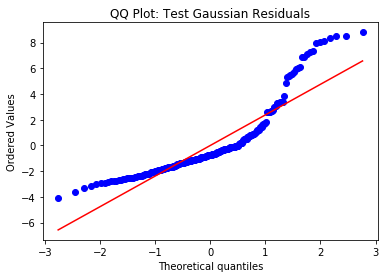

In [232]:
import pylab
import scipy.stats as stats
stats.probplot(y_np_2-y_hat_2, dist='norm', plot=pylab)
pylab.title('QQ Plot: Test Gaussian Residuals')
pylab.show()

In [233]:
######
###### REVENIR DESSUS 
######

In [234]:
# j.drop('life_expectancy',axis=1)

In [118]:
df3333=df3.copy()
df3333.gdp=df3333.gdp/df3333['population']
df3333.drop('population',axis=1,inplace=True)
for i,j in df3333.groupby(['status','continent']):
    j=j.drop(['status','continent'],axis=1)
    model2=sm.OLS(j.life_expectancy,add_constant(j.drop(['life_expectancy','infant_deaths','measles','gdp','hepatitis_b','thinness__1_19_years','polio','total_expenditure'],axis=1)))
    model2_fit=model2.fit()
    display(model2_fit.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          5.78e-141
Time:                        17:51:58   Log-Likelihood:                -1176.5
No. Observations:                 439   AIC:                             2377.
Df Residuals:                     427   BIC:                             2426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              52.8919      1.280     41.329      0.000      50.376      55.407
year                               -0.3773      0.054     -7.021      0.000      -0.483      -0.272
adult_mortality                    -0.0060      0.001     -4.321      0.000      -0.009      -0.003
alcohol                            -0.3428      0.069     -4.988      0.000      -0.478      -0.208
percentage_expenditure              0.0024      0.001      2.552      0.011       0.001       0.004
bmi                                 0.0814      0.016      4.942      0.000       0.049       0.114
under_five_deaths                  -0.0051      0.002     -3.322      0.001      -0.008      -0.002
diphtheria                          0.0233      0.008      3.062      0.002       0.008       0.038
hiv/aids                           -0.5246      0.030    -17.634      0.000      -0.583      -0.466
thinness_5_9_years                 -0.1884      0.076     -2.489      0.013      -0.337      -0.040
income_composition_of_resources    18.7598      2.403      7.807      0.000      14.037      23.483
schooling                           0.4177      0.129      3.228      0.001       0.163       0.672
==============================================================================
Omnibus:                       14.744   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.614
Skew:                           0.165   Prob(JB):                     1.01e-06
Kurtosis:                       4.183   Cond. No.                     5.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     84.42
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.45e-94
Time:                        17:51:58   Log-Likelihood:                -928.36
No. Observations:                 383   AIC:                             1881.
Df Residuals:                     371   BIC:                             1928.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              56.8022      1.307     43.448      0.000      54.231      59.373
year                               -0.0682      0.038     -1.815      0.070      -0.142       0.006
adult_mortality                    -0.0275      0.002    -13.658      0.000      -0.032      -0.024
alcohol                            -0.0482      0.080     -0.603      0.547      -0.206       0.109
percentage_expenditure              0.0012      0.000      3.755      0.000       0.001       0.002
bmi                                 0.0082      0.010      0.793      0.428      -0.012       0.029
under_five_deaths                  -0.0016      0.001     -2.675      0.008      -0.003      -0.000
diphtheria                          0.0284      0.008      3.472      0.001       0.012       0.044
hiv/aids                           -1.3994      1.051     -1.331      0.184      -3.466       0.667
thinness_5_9_years                  0.0513      0.030      1.708      0.089      -0.008       0.110
income_composition_of_resources     4.8810      0.903      5.407      0.000       3.106       6.656
schooling                           0.9916      0.106      9.338      0.000       0.783       1.200
==============================================================================
Omnibus:                       17.419   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.356
Skew:                          -0.272   Prob(JB):                     1.55e-07
Kurtosis:                       4.292   Cond. No.                     5.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     45.07
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.62e-35
Time:                        17:51:58   Log-Likelihood:                -252.05
No. Observations:                 117   AIC:                             528.1
Df Residuals:                     105   BIC:                             561.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              76.9024      4.059     18.945      0.000      68.854      84.951
year                                0.1457      0.069      2.113      0.037       0.009       0.282
adult_mortality                    -0.0189      0.004     -4.255      0.000      -0.028      -0.010
alcohol                            -0.0996      0.071     -1.393      0.166      -0.241       0.042
percentage_expenditure              0.0004      0.000      2.054      0.042     1.3e-05       0.001
bmi                                 0.0181      0.015      1.178      0.241      -0.012       0.049
under_five_deaths                  -0.0205      0.188     -0.109      0.913      -0.394       0.353
diphtheria                          0.0003      0.012      0.022      0.983      -0.024       0.024
hiv/aids                           -1.7320      2.296     -0.754      0.452      -6.286       2.821
thinness_5_9_years                 -3.5199      0.544     -6.466      0.000      -4.599      -2.441
income_composition_of_resources    -5.7689      2.451     -2.354      0.020     -10.629      -0.909
schooling                           0.6745      0.241      2.795      0.006       0.196       1.153
==============================================================================
Omnibus:                       27.355   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.204
Skew:                           0.881   Prob(JB):                     6.94e-15
Kurtosis:                       6.205   Cond. No.                     4.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.98e-35
Time:                        17:51:59   Log-Likelihood:                -117.41
No. Observations:                  63   AIC:                             258.8
Df Residuals:                      51   BIC:                             284.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              60.2797      3.782     15.939      0.000      52.687      67.872
year                               -0.3235      0.107     -3.034      0.004      -0.537      -0.109
adult_mortality                    -0.0053      0.002     -2.854      0.006      -0.009      -0.002
alcohol                            -0.1200      0.120     -1.004      0.320      -0.360       0.120
percentage_expenditure              0.0011      0.001      1.082      0.285      -0.001       0.003
bmi                                 0.0997      0.043      2.336      0.023       0.014       0.185
under_five_deaths                  -0.7675      0.076    -10.080      0.000      -0.920      -0.615
diphtheria                         -0.0143      0.011     -1.314      0.195      -0.036       0.008
hiv/aids                           -0.4428      0.021    -20.607      0.000      -0.486      -0.400
thinness_5_9_years                 -0.1189      0.186     -0.640      0.525      -0.492       0.254
income_composition_of_resources    70.6757     13.885      5.090      0.000      42.800      98.552
schooling                          -2.2672      0.837     -2.708      0.009      -3.948      -0.586
==============================================================================
Omnibus:                       10.699   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.028
Skew:                           0.480   Prob(JB):                     7.38e-05
Kurtosis:                       5.516   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     36.91
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.65e-38
Time:                        17:51:59   Log-Likelihood:                -359.01
No. Observations:                 168   AIC:                             742.0
Df Residuals:                     156   BIC:                             779.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              61.7449      2.686     22.986      0.000      56.439      67.051
year                               -0.0210      0.045     -0.466      0.642      -0.110       0.068
adult_mortality                    -0.0045      0.003     -1.484      0.140      -0.010       0.001
alcohol                            -0.3000      0.166     -1.808      0.073      -0.628       0.028
percentage_expenditure              0.0002      0.000      1.248      0.214   -9.68e-05       0.000
bmi                                 0.0086      0.012      0.720      0.473      -0.015       0.032
under_five_deaths                  -0.0208      0.014     -1.453      0.148      -0.049       0.007
diphtheria                         -0.0053      0.009     -0.618      0.538      -0.022       0.012
hiv/aids                           -0.0939      0.342     -0.275      0.784      -0.769       0.581
thinness_5_9_years                 -1.3915      0.169     -8.232      0.000      -1.725      -1.058
income_composition_of_resources    45.7975      6.188      7.401      0.000      33.575      58.020
schooling                          -1.1496      0.368     -3.123      0.002      -1.877      -0.423
==============================================================================
Omnibus:                        2.480   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.066
Skew:                           0.252   Prob(JB):                        0.356
Kurtosis:                       3.205   Cond. No.                     6.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     22.75
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           8.31e-22
Time:                        17:51:59   Log-Likelihood:                -233.97
No. Observations:                 105   AIC:                             491.9
Df Residuals:                      93   BIC:                             523.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              62.3823      1.806     34.541      0.000      58.796      65.969
year                                0.1819      0.080      2.287      0.024       0.024       0.340
adult_mortality                     0.0036      0.003      1.109      0.270      -0.003       0.010
alcohol                             1.5875      0.323      4.909      0.000       0.945       2.230
percentage_expenditure              0.0060      0.001      4.193      0.000       0.003       0.009
bmi                                 0.0012      0.015      0.082      0.935      -0.028       0.031
under_five_deaths                  -0.7547      0.263     -2.867      0.005      -1.277      -0.232
diphtheria                         -0.0121      0.010     -1.209      0.230      -0.032       0.008
hiv/aids                            3.8034      3.141      1.211      0.229      -2.435      10.042
thinness_5_9_years                 -0.3257      0.225     -1.447      0.151      -0.773       0.121
income_composition_of_resources     2.6229      1.618      1.621      0.108      -0.590       5.836
schooling                           0.1031      0.152      0.679      0.499      -0.199       0.405
==============================================================================
Omnibus:                       16.307   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.496
Skew:                           0.944   Prob(JB):                     9.63e-05
Kurtosis:                       3.816   Cond. No.                     4.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     87.76
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.02e-51
Time:                        17:51:59   Log-Likelihood:                -203.91
No. Observations:                 130   AIC:                             431.8
Df Residuals:                     118   BIC:                             466.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              50.4633      3.287     15.352      0.000      43.954      56.973
year                               -0.0084      0.036     -0.233      0.816      -0.080       0.063
adult_mortality                     0.0032      0.002      1.411      0.161      -0.001       0.008
alcohol                            -0.0860      0.114     -0.751      0.454      -0.313       0.141
percentage_expenditure           9.941e-05      0.000      0.401      0.689      -0.000       0.001
bmi                                -0.0060      0.008     -0.752      0.454      -0.022       0.010
under_five_deaths                   0.0214      0.006      3.710      0.000       0.010       0.033
diphtheria                          0.0007      0.007      0.102      0.919      -0.013       0.015
hiv/aids                           -0.5948      0.428     -1.390      0.167      -1.442       0.252
thinness_5_9_years                 -1.3428      0.219     -6.134      0.000      -1.776      -0.909
income_composition_of_resources    50.9258      7.242      7.032      0.000      36.585      65.266
schooling                          -0.7834      0.227     -3.452      0.001      -1.233      -0.334
==============================================================================
Omnibus:                       11.192   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.777
Skew:                           0.489   Prob(JB):                     0.000618
Kurtosis:                       4.332   Cond. No.                     5.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\leila\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     28.55
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           0.000316
Time:                        17:51:59   Log-Likelihood:                 1.2794
No. Observations:                  15   AIC:                             15.44
Df Residuals:                       6   BIC:                             21.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
year                                3.2495      2.457      1.323      0.234      -2.763       9.262
adult_mortality                     0.0009      0.006      0.151      0.885      -0.014       0.016
alcohol                            -0.2606      0.113     -2.297      0.061      -0.538       0.017
percentage_expenditure             -0.0002      0.000     -1.544      0.174      -0.001       0.000
bmi                                -6.1519      5.309     -1.159      0.291     -19.142       6.838
under_five_deaths               -1.045e-12   6.16e-13     -1.696      0.141   -2.55e-12    4.62e-13
diphtheria                          0.0564      0.215      0.262      0.802      -0.470       0.583
hiv/aids                           39.4604     24.739      1.595      0.162     -21.073      99.994
thinness_5_9_years                394.6039    247.387      1.595      0.162    -210.729     999.937
income_composition_of_resources     1.3707     74.582      0.018      0.986    -181.125     183.866
schooling                          -0.2350      0.879     -0.268      0.798      -2.385       1.915
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   3.053
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.388
Skew:                           0.744   Prob(JB):                        0.500
Kurtosis:                       2.942   Cond. No.                     3.25e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     37.18
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.37e-40
Time:                        17:51:59   Log-Likelihood:                -513.38
No. Observations:                 213   AIC:                             1049.
Df Residuals:                     202   BIC:                             1086.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
year                                0.1544      0.055      2.822      0.005       0.046       0.262
adult_mortality                    -0.0021      0.004     -0.519      0.604      -0.010       0.006
alcohol                            -0.0330      0.087     -0.378      0.706      -0.205       0.139
percentage_expenditure           6.015e-05   7.24e-05      0.831      0.407   -8.25e-05       0.000
bmi                                 0.0047      0.011      0.442      0.659      -0.016       0.026
under_five_deaths                   0.4314      0.157      2.741      0.007       0.121       0.742
diphtheria                         -0.0247      0.026     -0.964      0.336      -0.075       0.026
hiv/aids                          578.9781     57.559     10.059      0.000     465.486     692.471
thinness_5_9_years                 -2.0696      0.275     -7.523      0.000      -2.612      -1.527
income_composition_of_resources    38.1996      7.479      5.108      0.000      23.453      52.946
schooling                          -0.4980      0.199     -2.509      0.013      -0.889      -0.107
==============================================================================
Omnibus:                       60.886   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.765
Skew:                           1.489   Prob(JB):                     1.46e-24
Kurtosis:                       4.870   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\leila\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     82.38
Date:                Mon, 25 Nov 2019   Prob (F-statistic):            0.00195
Time:                        17:51:59   Log-Likelihood:                 12.571
No. Observations:                  14   AIC:                            -3.142
Df Residuals:                       3   BIC:                             3.888
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
year                                0.6154      0.241      2.551      0.084      -0.152       1.383
adult_mortality                     0.0028      0.008      0.325      0.766      -0.024       0.030
alcohol                            -1.3027      0.580     -2.247      0.110      -3.148       0.543
percentage_expenditure            3.91e-05   5.37e-05      0.728      0.520      -0.000       0.000
bmi                                -0.0847      0.011     -7.974      0.004      -0.118      -0.051
under_five_deaths                  -0.0319      0.386     -0.083      0.939      -1.260       1.196
diphtheria                          0.0163      0.340      0.048      0.965      -1.067       1.100
hiv/aids                         3070.6518   1004.547      3.057      0.055    -126.264    6267.567
thinness_5_9_years                -29.5345      4.014     -7.359      0.005     -42.307     -16.762
income_composition_of_resources  -201.5579     93.483     -2.156      0.120    -499.063      95.948
schooling                          -0.5675      0.346     -1.638      0.200      -1.670       0.535
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   3.161
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.105
Skew:                           0.582   Prob(JB):                        0.575
Kurtosis:                       2.264   Cond. No.                     1.32e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
####my test and try 

# #Rmk Eldiias 
# # crea d'une col continent 
# # Drop NaN
# # dummies on it 

# dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in dict_c_p.items() })
# # dict_df 

# df3.groupby(['status'])['life_expectancy'].agg('mean').plot()



# df_Country=pd.DataFrame(dict_c_p) # len dif not good
# df_CC = pd.DataFrame.from_dict(dict_c_p, orient='index')
# change orientation of index 
# df_Country 
# h2 span.mw-headline:not(:contains('aussi')):not(:contains('Notes'))
# lst = []
# for l in my_list:
#     lst.append([s.replace(u'\xa0','') for s in l])
# next(i for i in dict_c_p if dict_c_p[i] == dict_c_p[i:])
# countrylist = df.Country.unique().tolist()
# pays=[[j.text.strip() for j in element.select('tr ul > li')] for element in soup.select('h2 + table')]
# dict_c_p=dict(zip(continents,pays))
# df2= [pd.DataFrame({ key:pd.Series(value) for key, value in dict_c_p.items() })]+df
# df['Continent'].value_counts()

# accents= { 'a': ['à', 'ã', 'á','ä'], 'e': ['é', 'è', 'ê','ë'], 'i' : ['ï','î'], 'o':['ô','ö'], 'u':['ù','ü','û'],'Oceanie':['Océanie']}

# 
# y =df.col1
# X=df.drop(col1,axis=1)

# df2.rename(columns={'Life expectancy ':'Life_expectancy',' BMI ': 'BMI',' HIV/AIDS':'HIV/AIDS',' thinness 5-9 years':'thinness_5_9_years','  thinness 1-19 years':'thinness_1_19_years','Measles ':'Measles','Diphtheria ':'Diphtheria','Income composition of resources':'Income_composition_resources'  }, inplace=True)


# df3[df3.year<2015].groupby('year').percentage_expenditure.mean().plot()



# df3.groupby(['Life_expectancy','Adult Mortality','Year'])['Continent'].agg(sum)
# pd.crosstab(index = df3.status,columns= df3.life_expectancy)
# maladie=['Hepatitis B','Measles','HIV/AIDS','Polio','Diphtheria']
# df2[maladie].hist(figsize=(12,4));
# df3.groupby(['Continent','Life_expectancy'])['Status'].agg('count')
# df3.groupby(['continent'])['status'].agg('count')
# df3.continent.value_counts()
# df3.year.value_counts()

# # Prepare a vector of color mapped to the 'Life_expectancy'  column
# my_palette = dict(zip(df_corr['life_expectancy'].unique(), ["orange","yellow","brown","red","pink"]))
# row_colors = df_corr['life_expectancy'].map(my_palette)
# # plot
# sns.clustermap(df_corr, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)



# ######## NOt clear 
# plt.figure(figsize=(20,15))
# sns.clustermap(df_corr)



# fig, axes=plt.subplots(1,2, sharey=True, figsize=(6,4))

# sns.boxplot(data=df4['Life_expectancy '], ax=axes[0])
# sns.violinplot(data=df4['Life_expectancy '], ax=axes[1])

# fig, axes=plt.subplots(1,2, sharey=True, figsize=(16,4))

# sns.countplot(x='Total expenditure',data=df, ax=axes[0])
# sns.countplot(x='Alcohol',data=df, ax=axes[1])



# low_variance=[]
# for col in df4._get_numeric_data():
#     minimum=min(df4[col])
#     ninety_perc=np.percentile(df4[col],90)
#     if ninety_perc==minimum:
#         low_variance.append(col)
# print(low_variance)
# # 3 des dummies 